

```
# This is formatted as code for Ad Click Prediction
```
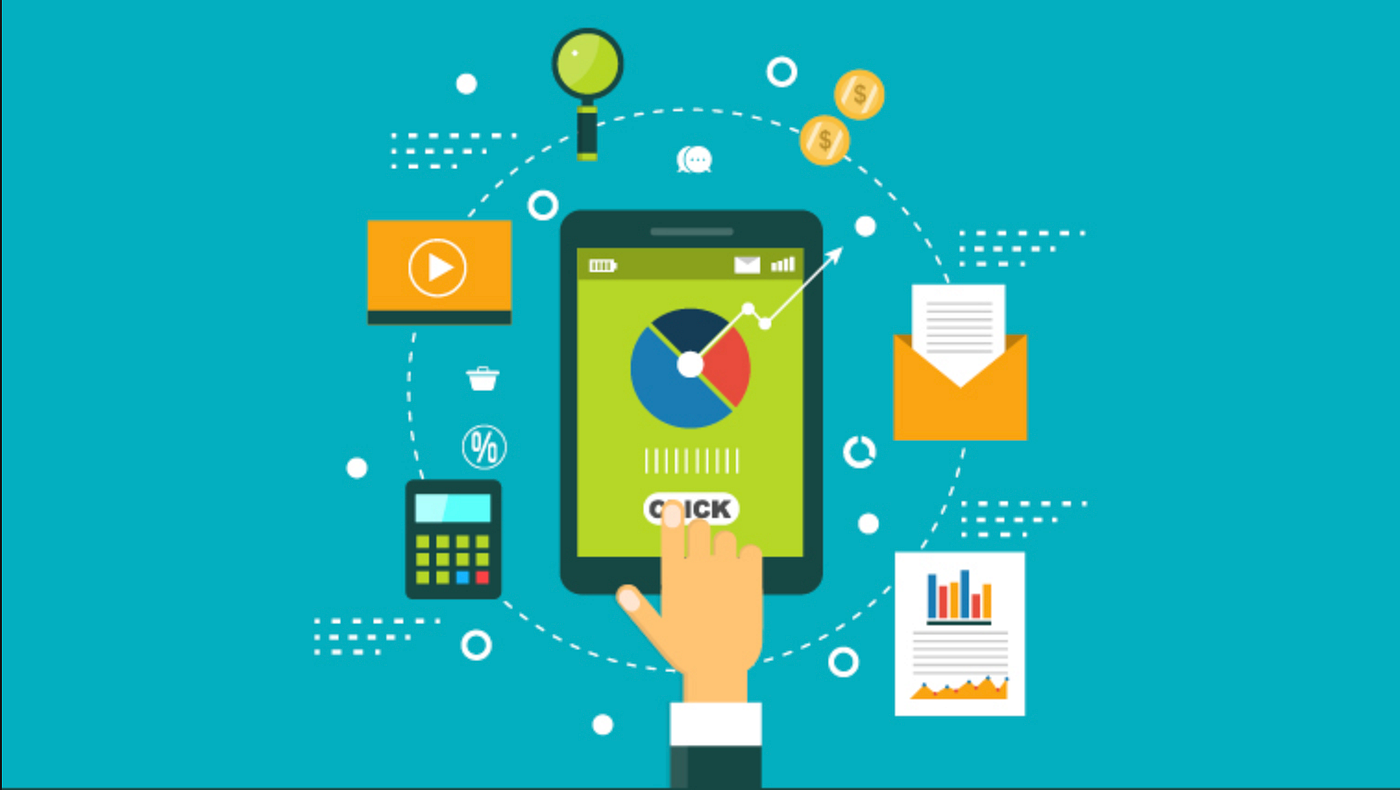


# Importing libraries

In [1]:
# Importing Libreries
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
import plotly.io as pio
pio.templates.default = "presentation"

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Unzip the file
import zipfile

from sklearn.datasets import make_moons, make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, VotingRegressor, \
                            GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR

# Download and Reading the data

In [2]:
# Download latest version
path = kagglehub.dataset_download("tbyrnes/advertising")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/tbyrnes/advertising/versions/1


In [3]:
# Read the data
df = pd.read_csv('/root/.cache/kagglehub/datasets/tbyrnes/advertising/versions/1/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
df.isna().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Male,0
Country,0
Timestamp,0
Clicked on Ad,0


In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
df['Clicked on Ad'].value_counts()

,count
Clicked on Ad,
0,500
1,500


In [8]:
df['Ad Topic Line'].value_counts()

,count
Ad Topic Line,
Virtual 5thgeneration emulation,1
Cloned 5thgeneration orchestration,1
Monitored national standardization,1
Organic bottom-line service-desk,1
Triple-buffered reciprocal time-frame,1
...,...
Centralized content-based focus group,1
Team-oriented grid-enabled Local Area Network,1
Centralized neutral neural-net,1


In [9]:
df['Country'].value_counts()

,count
Country,
Czech Republic,9
France,9
Senegal,8
Peru,8
Greece,8
...,...
Kiribati,1
Marshall Islands,1
Bermuda,1


In [10]:
df['Timestamp'].value_counts()

,count
Timestamp,
2016-06-03 21:43:21,1
2016-03-27 00:53:11,1
2016-04-04 01:39:02,1
2016-03-13 20:35:42,1
2016-01-10 02:31:19,1
...,...
2016-06-03 01:14:41,1
2016-05-08 08:10:10,1
2016-03-16 20:19:01,1


# EDA, Feature Engineering and Data spilit

<Axes: >

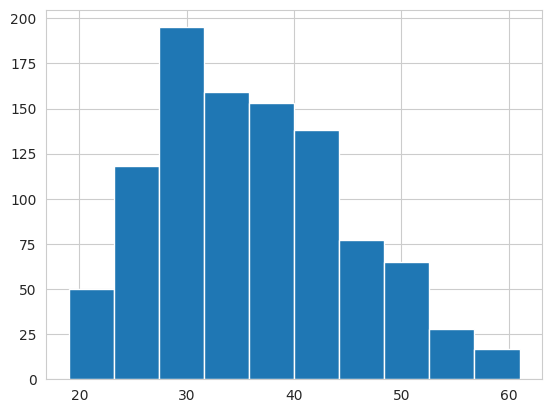

In [11]:
df["Age"].hist()

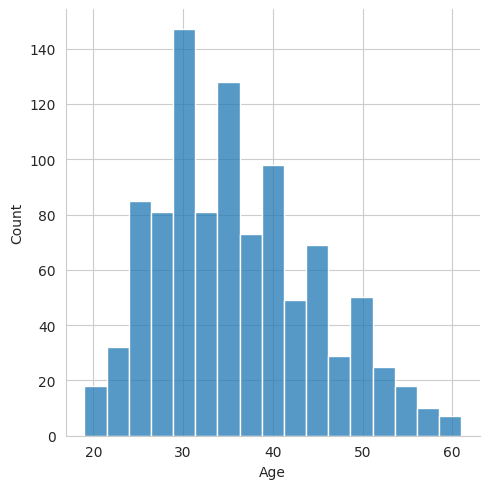

In [12]:
sns.displot(data=df,x="Age")

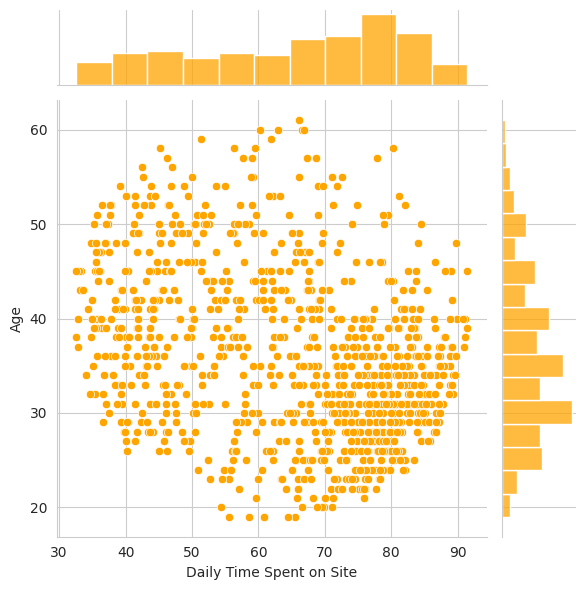

In [13]:
sns.jointplot(data=df, x='Daily Time Spent on Site', y='Age', kind="scatter", color="orange", palette='Set1')

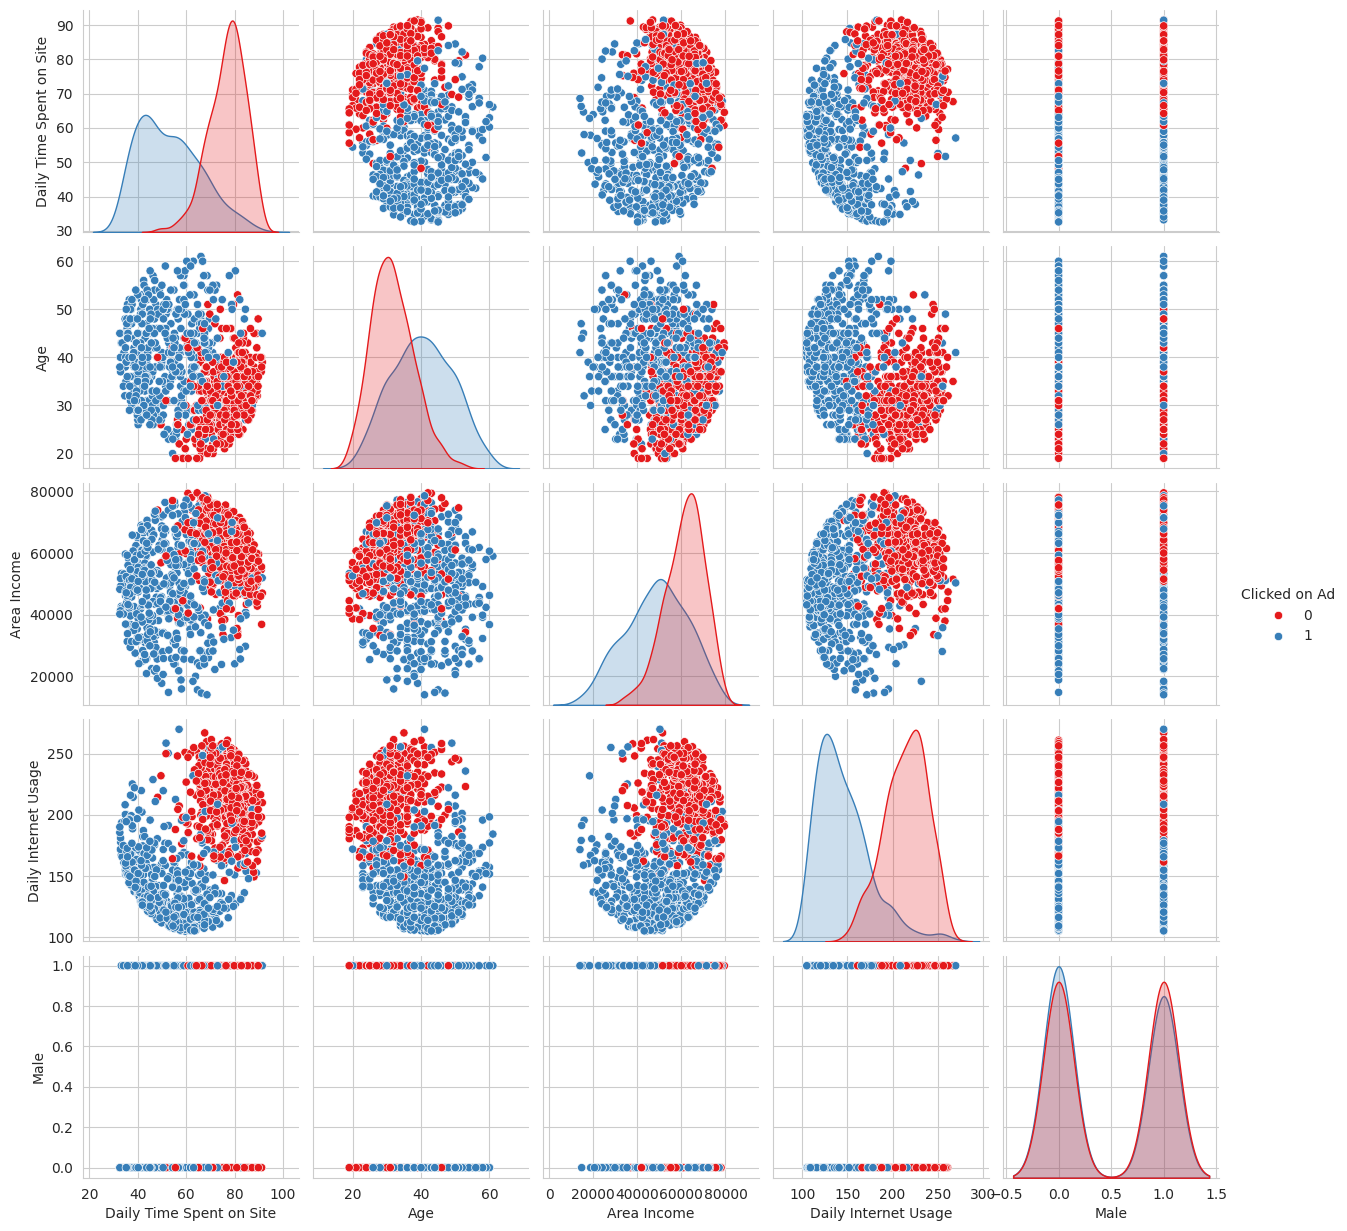

In [14]:
sns.pairplot(data=df,hue="Clicked on Ad", palette='Set1')

In [15]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['city encoded']=le.fit_transform(df['City'])
df['country encoded']=le.fit_transform(df['Country'])

In [17]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,city encoded,country encoded
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,961,215
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,903,147
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,111,184
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,939,103
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,805,96


In [18]:
df.drop(['Ad Topic Line', 'City', 'Country'], axis=1, inplace=True)

In [19]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city encoded,country encoded
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,961,215
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,903,147
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,111,184
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,939,103
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,805,96


In [20]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [21]:
df.corr()['Clicked on Ad'].sort_values(ascending=False)

,Clicked on Ad
Clicked on Ad,1.000000
Age,0.492531
Timestamp,0.015056
country encoded,0.011415
city encoded,-0.007554
Male,-0.038027
Area Income,-0.476255
Daily Time Spent on Site,-0.748117
Daily Internet Usage,-0.786539


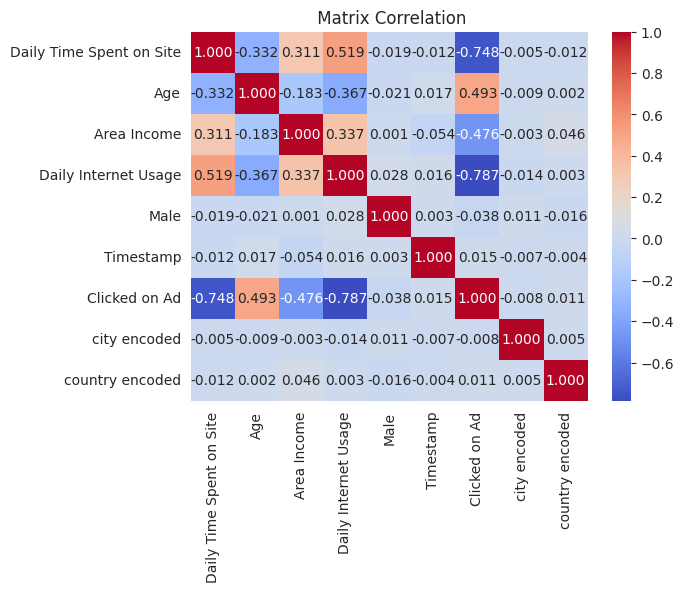

In [22]:
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='coolwarm')
plt.title(' Matrix Correlation')
plt.show()

# Features selection for scaling

In [23]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city encoded,country encoded
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,961,215
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,903,147
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,111,184
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,939,103
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,805,96


In [24]:
# Numeric and categorical columns
num_feats = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
cat_feats = ['Male', 'Timestamp', 'Clicked on Ad','city encoded', 'country encoded']

# Column transformer to scale numeric features
pipe = make_column_transformer(
    (StandardScaler(), num_feats),
    remainder='passthrough'  # Keep categorical columns
)

# Fit and transform
df_transformed = pipe.fit_transform(df)

# Create DataFrame with correct column names
df_new = pd.DataFrame(df_transformed, columns= num_feats +cat_feats)

df_new.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city encoded,country encoded
0,0.249267,-0.114905,0.509691,1.73403,0,2016-03-27 00:53:11,0,961,215
1,0.961132,-0.570425,1.00253,0.313805,1,2016-04-04 01:39:02,0,903,147
2,0.282083,-1.139826,0.356949,1.287589,0,2016-03-13 20:35:42,0,111,184
3,0.577432,-0.798185,-0.014456,1.50158,1,2016-01-10 02:31:19,0,939,103
4,0.212664,-0.114905,1.408868,1.038731,0,2016-06-03 03:36:18,0,805,96


# Time handling

In [25]:
#Extract basic datetime features
#df_new['year'] = df_new['Timestamp'].dt.year
#df_new['month'] = df_new['Timestamp'].dt.month
#df_new['day'] = df_new['Timestamp'].dt.day
#df_new['weekday'] = df_new['Timestamp'].dt.weekday  # Monday=0, Sunday=6
#df_new['hour'] = df_new['Timestamp'].dt.hour
#df_new['minute'] = df_new['Timestamp'].dt.minute
#df_new['second'] = df_new['Timestamp'].dt.second

# Cyclical encoding for cyclical features
#df_new['hour_sin'] = np.sin(2*np.pi*df['hour']/24)
#df_new['weekday_sin'] = np.sin(2*np.pi*df['weekday']/7)
#df_new['month_sin'] = np.sin(2*np.pi*(df['month']-1)/12)

In [29]:
y = df_new['Clicked on Ad']
X = df_new[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'city encoded', 'country encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
# Polynomial Regression with Ridge

poly_reg = Pipeline([('poly', PolynomialFeatures(degree=3)),
                    #('scaler', StandardScaler()),
                    ('ridge_reg', Ridge(alpha=1))])

poly_reg.fit(X_train, y_train)

y_pred = poly_reg.predict(X_test)


print('R2 score: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

R2 score:  0.852337685445546
Mean Absolute Error:  0.11981377889661725
Mean Squared Error:  0.036441418539655324


In [33]:
# Try Lasso Regression


lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)

print('Intercept: ', lasso_reg.intercept_)
print('Coefficient: ', lasso_reg.coef_)
print('********************')
# Evaluate the model

print('lin_reg2.score: ', lasso_reg.score(X_test, y_test))
print('R2 score: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Intercept:  0.5050782805151635
Coefficient:  [-1.42322881e-01  9.91506289e-03 -1.26770768e-02 -2.18872768e-01
 -0.00000000e+00 -4.49304388e-08  4.49317207e-05]
********************
lin_reg2.score:  0.7161145287825488
R2 score:  0.7161145287825488
Mean Absolute Error:  0.21685472665905114
Mean Squared Error:  0.07005978001345345


In [34]:
# Try Elastic Net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

y_pred = elastic_net.predict(X_test)

print('lin_reg2.score: ', elastic_net.score(X_test, y_test))
print('R2 score: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

lin_reg2.score:  0.7895239299637351
R2 score:  0.7895239299637351
Mean Absolute Error:  0.17048650913659547
Mean Squared Error:  0.05194315546194979
